# WHITE WINE

## Data Cleaning

In [1]:
# Import necessary libraries

import pandas as pd
import seaborn as sns
sns.set(style='whitegrid')
from collections import Counter
from matplotlib import pyplot as plt
%matplotlib inline 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
import itertools
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.feature_selection import RFECV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')
from itertools import combinations
from sklearn.feature_selection import RFECV
import itertools

In [2]:
# Load and preview 'winequality-red.csv' dataset

df = pd.read_csv('winequality-white.csv', sep=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [3]:
# Examine shape of dataset

df.shape

(4898, 12)

In [4]:
# Check datatypes in dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
fixed acidity           4898 non-null float64
volatile acidity        4898 non-null float64
citric acid             4898 non-null float64
residual sugar          4898 non-null float64
chlorides               4898 non-null float64
free sulfur dioxide     4898 non-null float64
total sulfur dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [5]:
# Check for null values in the dataset

df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
# Check for duplicates

df.duplicated().sum()

937

In [7]:
# Drop duplicate rows from dataset

df = df.drop_duplicates()

In [8]:
# Check the updated shape of the datset

df.shape

(3961, 12)

## Exploratory Data Analysis

In [9]:
# Explore statistical summary of dataset

df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000
mean,6.839346,0.280538,0.334332,5.914819,0.045905,34.889169,137.193512,0.993790,3.195458,0.490351,10.589358,5.854835
std,0.866860,0.103437,0.122446,4.861646,0.023103,17.210021,43.129065,0.002905,0.151546,0.113523,1.217076,0.890683
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.600000,0.035000,23.000000,106.000000,0.991620,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,4.700000,0.042000,33.000000,133.000000,0.993500,3.180000,0.480000,10.400000,6.000000
75%,7.300000,0.330000,0.390000,8.900000,0.050000,45.000000,166.000000,0.995710,3.290000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


### Visualize the Data

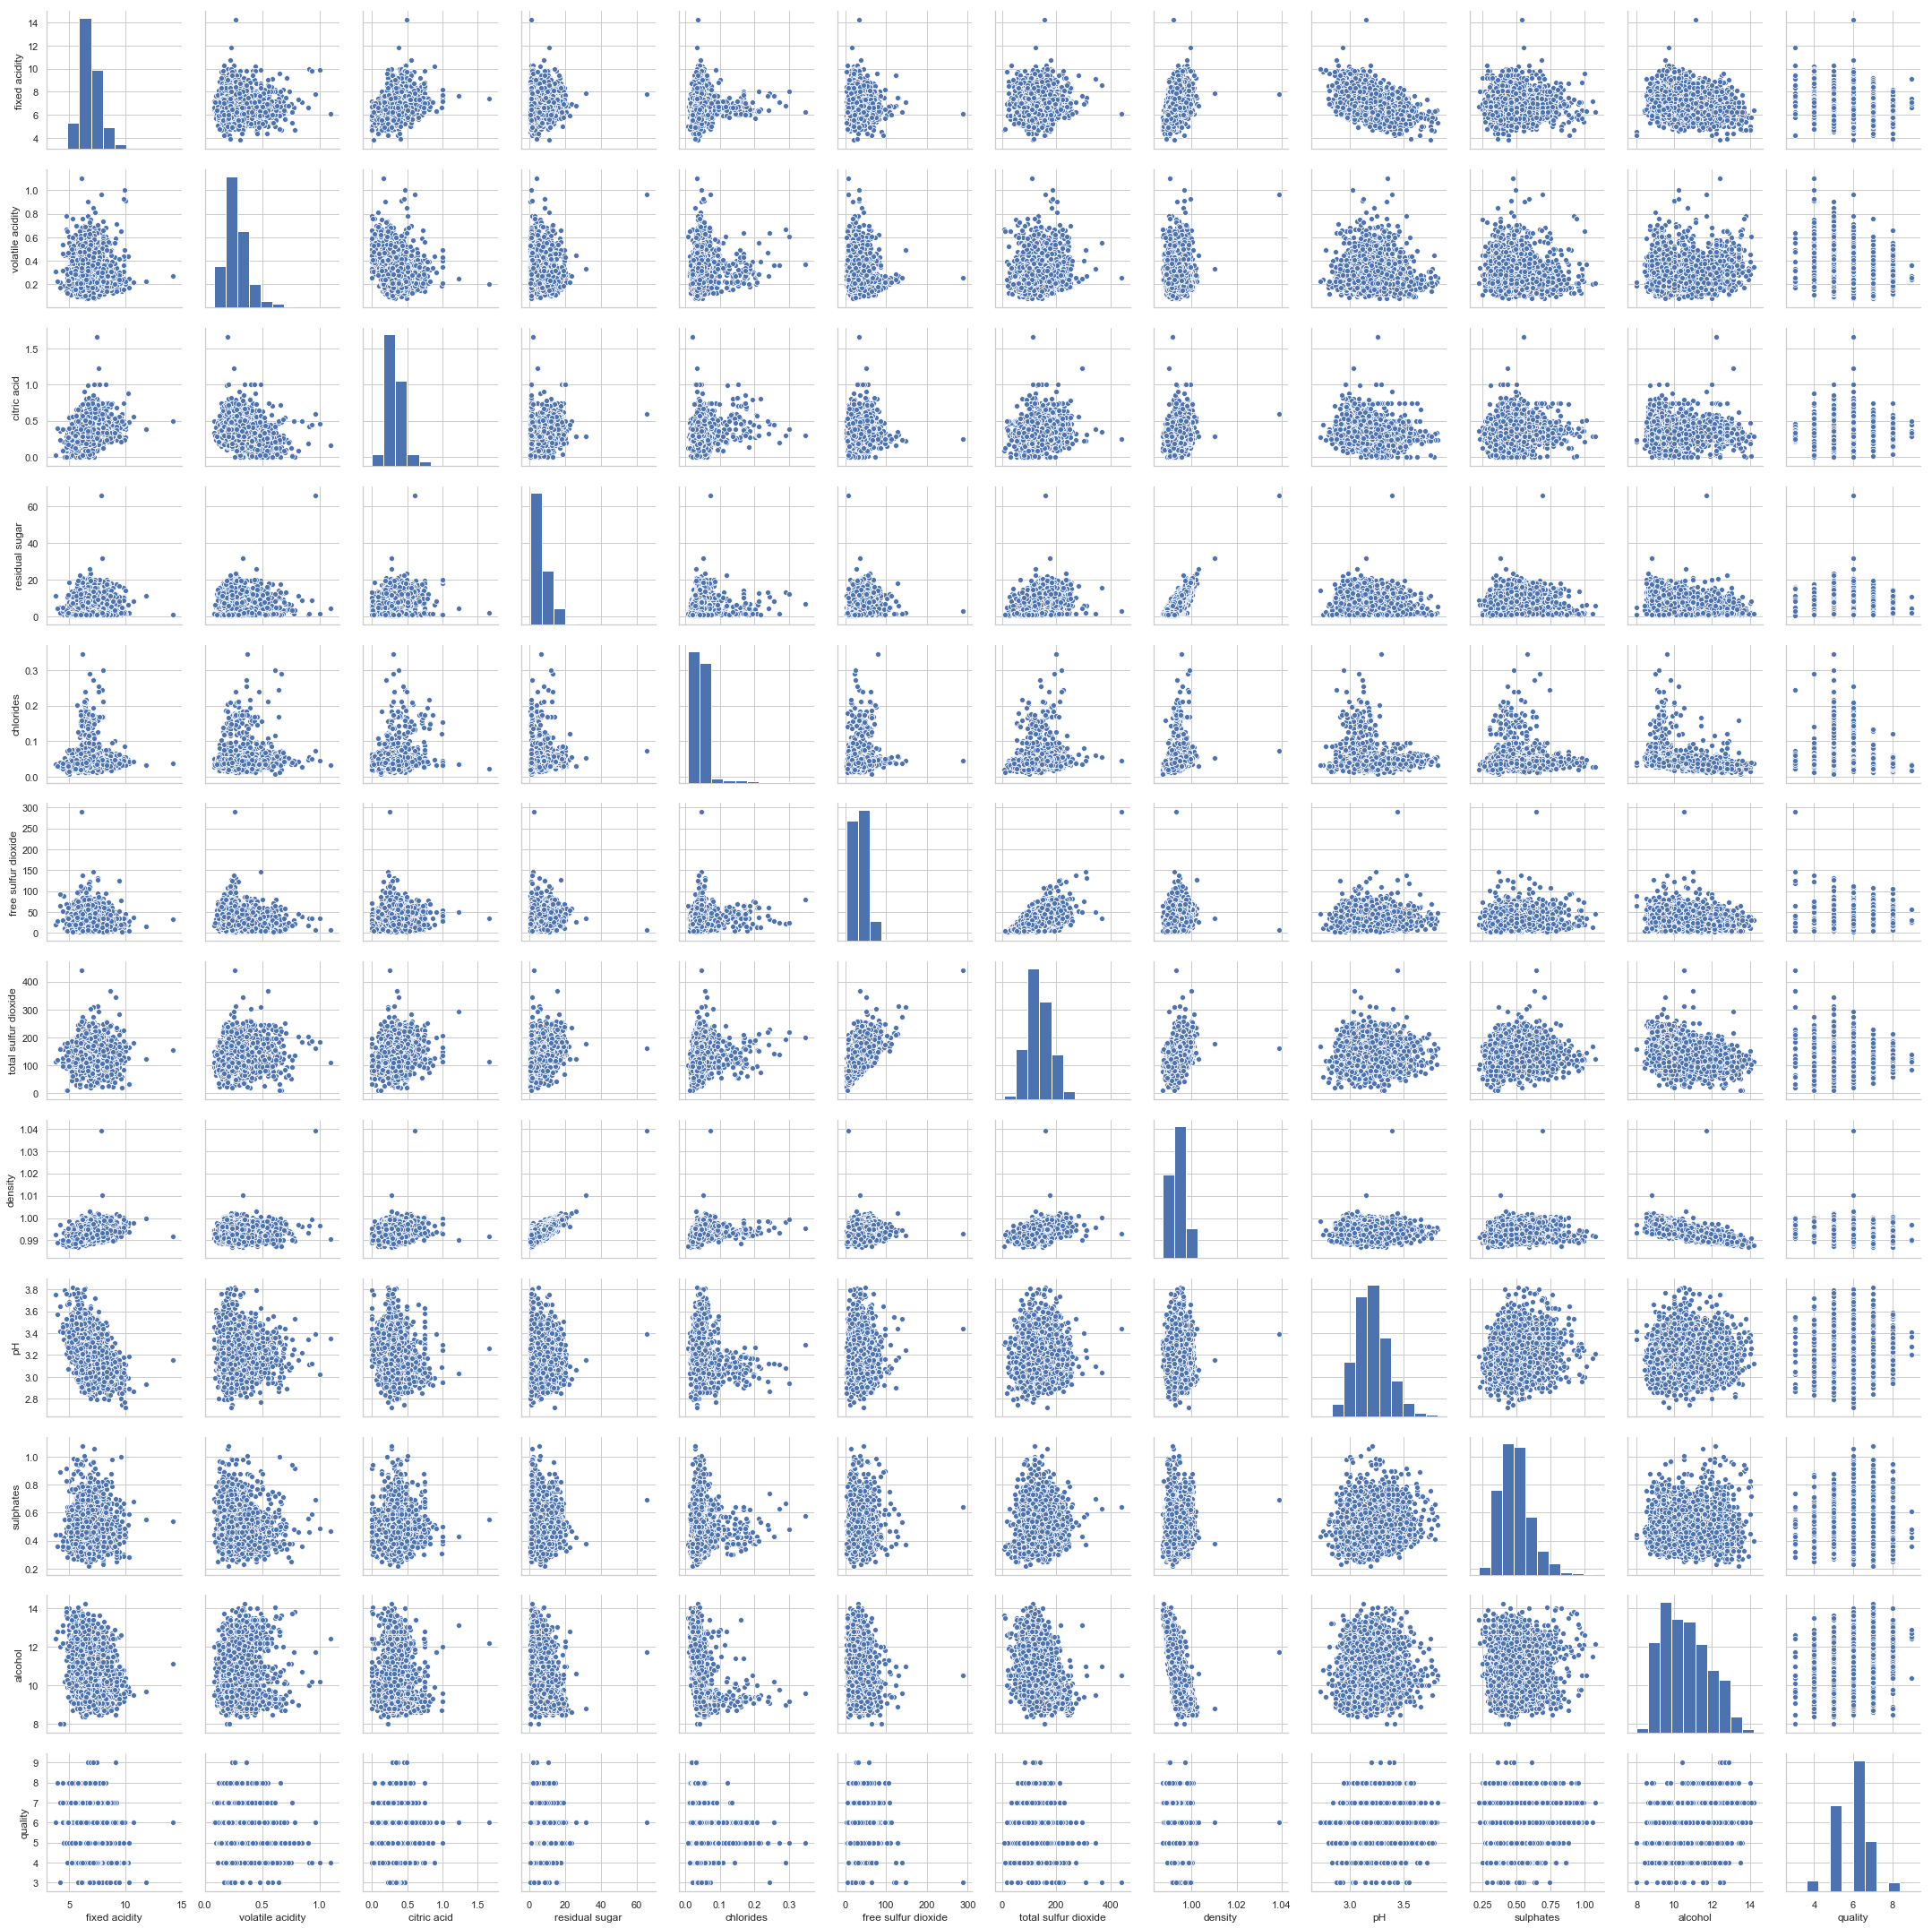

In [10]:
# View scatter plots between variables

sns.pairplot(df)

Counter({6: 1788, 5: 1175, 7: 689, 4: 153, 8: 131, 3: 20, 9: 5})


(array([   0.,  250.,  500.,  750., 1000., 1250., 1500., 1750., 2000.]),
 <a list of 9 Text yticklabel objects>)

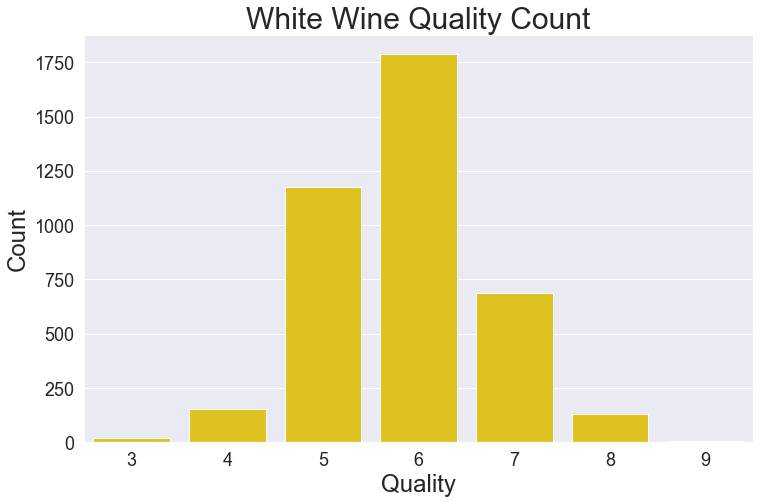

In [12]:
# Investigate unique target values and view quality distribution

print(Counter(sorted(df['quality'])))
sns.set(rc={'figure.figsize':(12,7.5)})
sns.countplot(x='quality', data=df, palette = ['gold'])
plt.title('White Wine Quality Count', fontsize=30)
plt.xlabel('Quality', fontsize=24)
plt.ylabel('Count', fontsize=24)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

In [13]:
# Change 3 & 4 & 5 & 6 to 0 (Bad), change 7, 8 & 9 to 1 (Good)

df['quality'] = df['quality'].replace([3,4, 5, 6], 0)
df['quality'] = df['quality'].replace([7,8, 9], 1)

In [14]:
# Create function to graph Good and Bad Wine data

def graph_data(feature):
    print(Counter(sorted(df[feature])))
    sns.set(rc={'figure.figsize':(10,6)})
    sns.countplot(x=feature, data=df, palette = ['gold'])
    cap_feature = feature.capitalize()
    plt.title('White Wine ' + cap_feature + ' Count', fontsize=30)
    plt.xlabel(cap_feature, fontsize=24)
    plt.ylabel('Count', fontsize=24)
    plt.xticks(np.arange(2), labels = ['Bad', 'Good'], fontsize=18)
    plt.yticks(fontsize=18)

Counter({0: 3136, 1: 825})


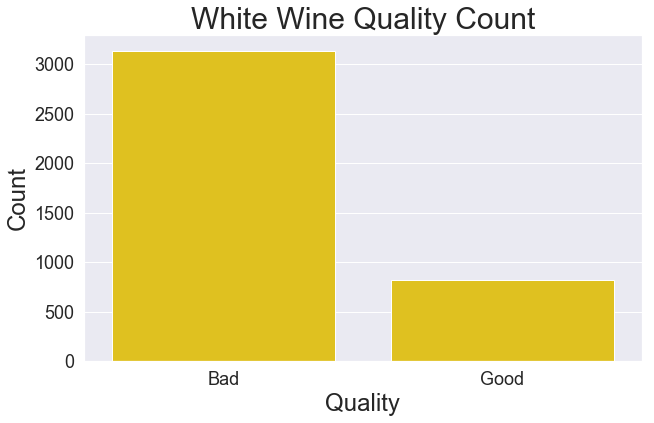

In [15]:
# View 'bad quality' vs. 'good quality' wine distribution

graph_data('quality')

In [17]:
# View new quality distribution stats

good_bad_dict = dict(Counter(sorted(df['quality'])))
good_bad_df = pd.DataFrame.from_dict(good_bad_dict, orient='index')
good_bad_df = good_bad_df.reset_index()
good_bad_df.columns = ['Quality', 'Count']
good_bad_df['Total %'] = round((good_bad_df['Count']/3961)*100, 2)
#good_bad_df['Quality'] = good_bad_df['Quality'].replace(0,'Bad')
#good_bad_df['Quality'] = good_bad_df['Quality'].replace(1, 'Good')

good_bad_df['Quality'] = good_bad_df['Quality'].replace(0,'Bad')
good_bad_df['Quality'] = good_bad_df['Quality'].replace(1, 'Good')

good_bad_df

,Quality,Count,Total %
0,Bad,3136,79.17
1,Good,825,20.83


In [18]:
# Update 'graph_data' function to look at how phsyiochemical features relate to each wine quality

def graph_data(feature):
    sns.set(rc={'figure.figsize':(10,6)})
    sns.barplot(x='quality', y=feature, data=df, palette = ['gold'])
    cap_feature = feature.title()
    plt.title('White Wine Quality vs. ' + cap_feature, fontsize=30)
    plt.xlabel('Quality', fontsize=24)
    plt.ylabel(cap_feature, fontsize=24)
    plt.xticks(np.arange(2), labels = ['Bad', 'Good'], fontsize=18)
    plt.yticks(fontsize=18)

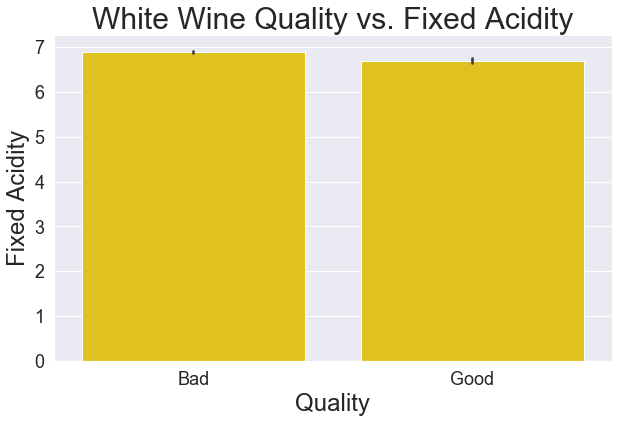

In [19]:
# View 'fixed acidity' across 'quality'

graph_data('fixed acidity')

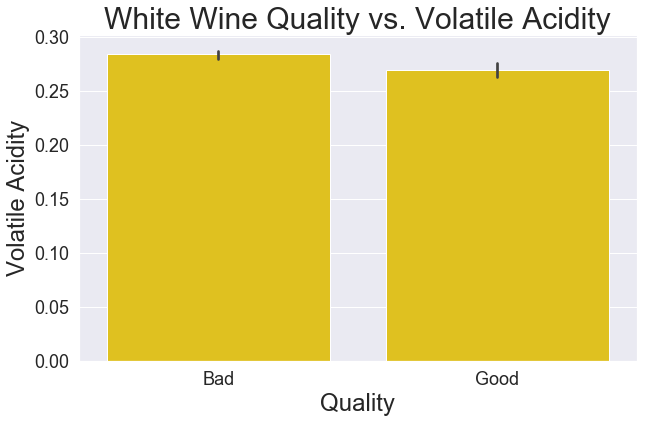

In [20]:
# View 'volatile acidity' across 'quality'

graph_data('volatile acidity')

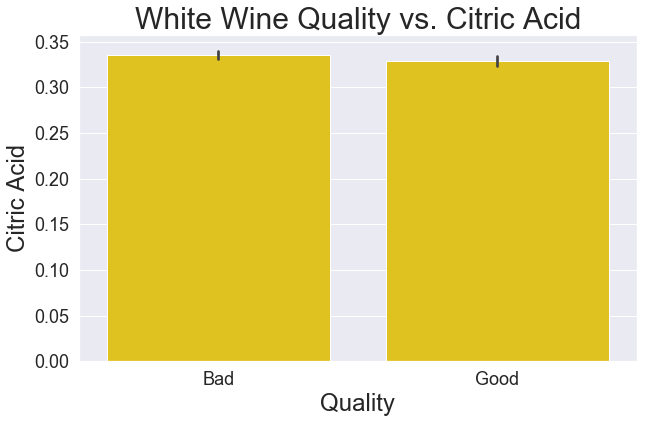

In [21]:
# View 'citric acid' across 'quality'

graph_data('citric acid')

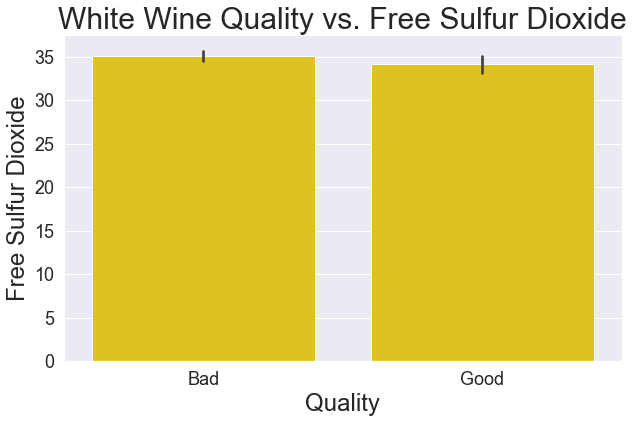

In [22]:
# View 'free sulfur dioxide' across 'quality'

graph_data('free sulfur dioxide')

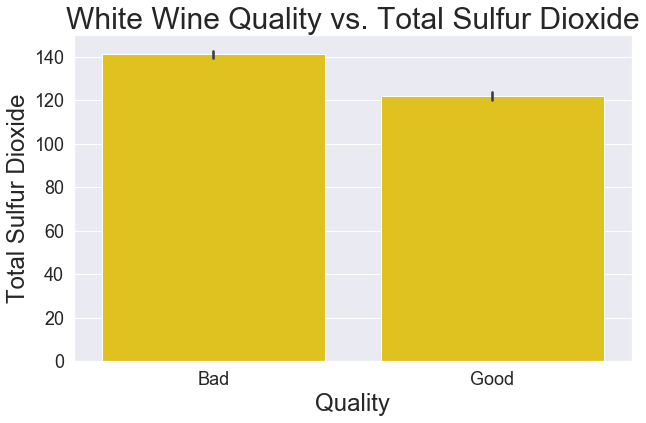

In [23]:
# View 'total sulfur dioxide' across 'quality'

graph_data('total sulfur dioxide')

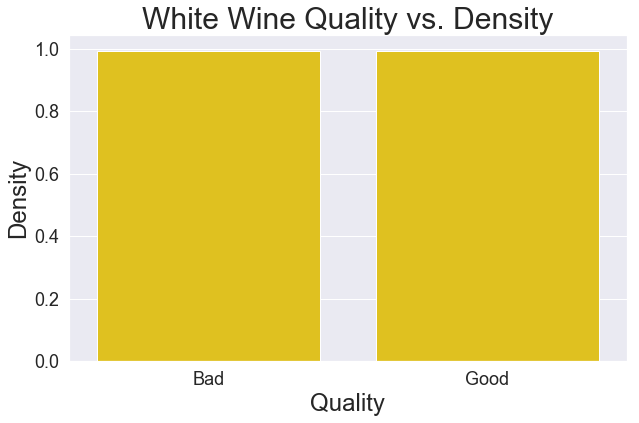

In [24]:
# View 'density' across 'quality'

graph_data('density')

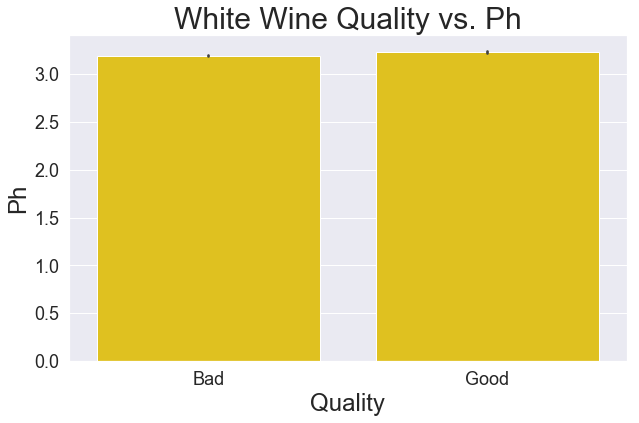

In [25]:
# View 'pH' across 'quality'

graph_data('pH')

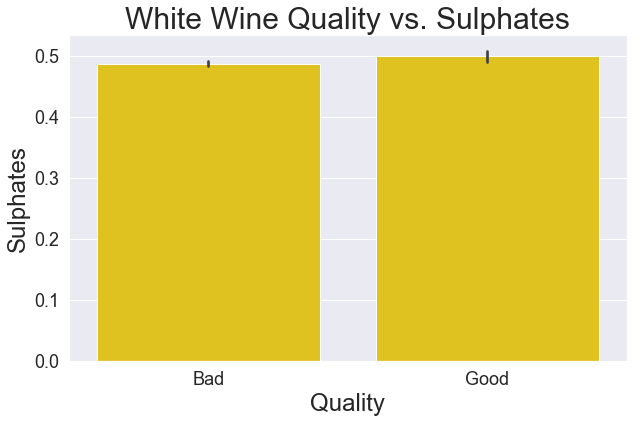

In [26]:
# View 'sulphates' across 'quality'

graph_data('sulphates')

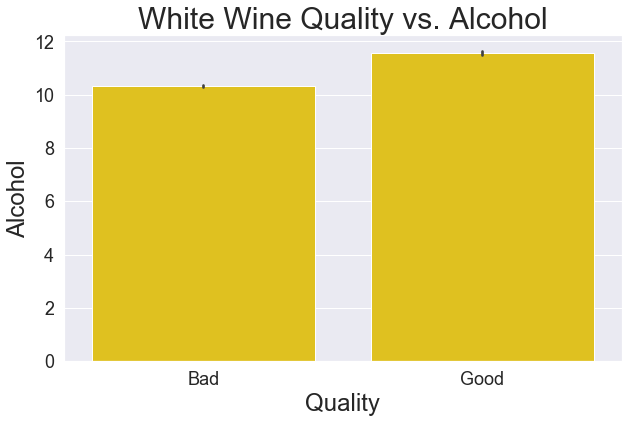

In [27]:
# View 'alcohol' across quality

graph_data('alcohol')

## Correlation

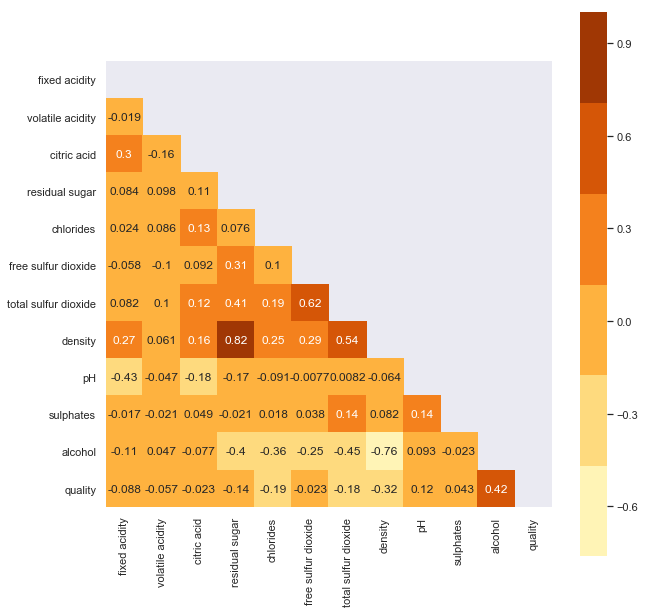

In [29]:
# View correlation among variables and check for multicollinearity using a heatmap

fig,ax = plt.subplots(figsize=(10,10))
mask = np.zeros_like(df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
color_map = sns.color_palette("YlOrBr")
ax = sns.heatmap(df.corr(), cmap=color_map, mask=mask, square=True, annot=True)

In [30]:
# Examine variables with highest correlation to 'quality'

df.corr()['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.416573
pH                      0.116922
sulphates               0.043327
citric acid            -0.022618
free sulfur dioxide    -0.022655
volatile acidity       -0.057399
fixed acidity          -0.087803
residual sugar         -0.138099
total sulfur dioxide   -0.180551
chlorides              -0.189573
density                -0.315023
Name: quality, dtype: float64

Text(0.5, 1.0, 'Feature Correlation with Wine Quality')

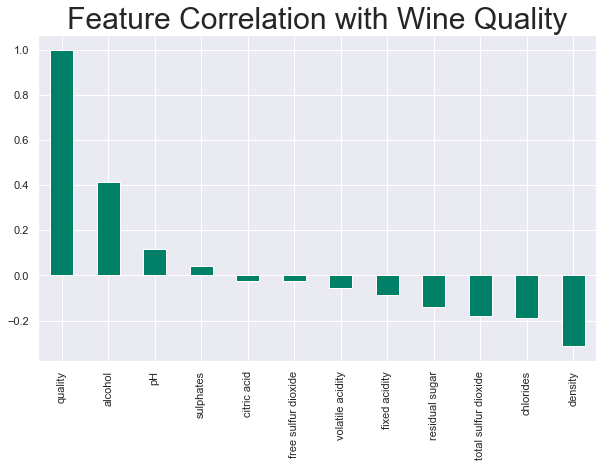

In [42]:
# Plot the variables correlation with Quality

df.corr()['quality'].sort_values(ascending=False).plot.bar(cmap="summer")
plt.style.use('seaborn-dark-palette')
plt.title('Feature Correlation with Wine Quality', fontsize=30)

### Skewness

In [43]:
# Investigate skewness

df.skew()

fixed acidity           0.696100
volatile acidity        1.641081
citric acid             1.310601
residual sugar          1.333639
chlorides               4.969076
free sulfur dioxide     1.566680
total sulfur dioxide    0.456800
density                 1.273318
pH                      0.455457
sulphates               0.937853
alcohol                 0.450697
quality                 1.437307
dtype: float64

In [44]:
# Log columns with high skews

df['chlorides_log'] = np.log(df['chlorides'])

df = df.drop('chlorides', axis=1)

## Modeling

### Handle Class Imbalance

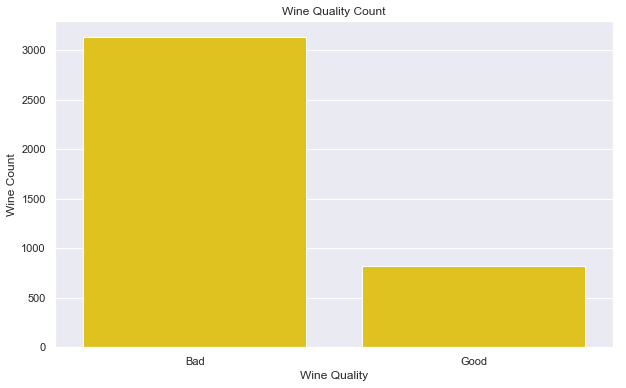

In [45]:
# View Class Imbalance

X = df.drop(['quality'], axis=1)
y =df['quality']
sns.countplot(y, palette = ['Gold'])
plt.title('Wine Quality Count')
plt.ylabel('Wine Count')
plt.xlabel('Wine Quality')
plt.xticks(np.arange(2), labels=['Bad','Good'])
plt.show()

In [46]:
# Split the data
y = pd.DataFrame(df, columns = ['quality'])
X = df.drop(['quality'], axis=1)

# Split the data into training and testing groups
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=34,test_size=0.25)

In [47]:
# Concatenate the training data back together
train = X_train.copy()
train['quality'] = y_train.values

# Separate classes
bad = train[train.quality==0]
good = train[train.quality==1]

In [48]:
# Get a class count to understand the class imbalance.

print('Bad Wine count: '+ str(len(bad)))
print('Good Wine Count: ' + str(len(good)))

Bad Wine count: 2360
Good Wine Count: 610


In [49]:
# Upsample Good Minority

good_upsampled = resample(good,
                          replace=True,
                          n_samples=round(1.95*len(good)), 
                          random_state=23)

In [50]:
# Combine Majority and Upsampled Minority
upsampled = pd.concat([bad, good_upsampled])

# Check new class counts
upsampled['quality'].value_counts()

0    2360
1    1190
Name: quality, dtype: int64

In [51]:
# Update X_train and y_train values

X_train = upsampled.drop('quality', axis=1)
y_train = upsampled.quality

### Model: Logistic Regression

#### Tune Hyperparameters

In [52]:
# Create our estimator
lr = LogisticRegression()
# Create our parameters to test
parameters={'penalty': ['l1','l2'], 
            'C': [.5,1,.1]}
# Create the instance of GridSearchCV
grid_lr=GridSearchCV(lr, parameters, cv=5, scoring='precision', verbose=2)
# Fit the Gridsearch to our data
grid_lr.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] C=0.5, penalty=l1 ...............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................................ C=0.5, penalty=l1, total=   0.2s
[CV] C=0.5, penalty=l1 ...............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV] ................................ C=0.5, penalty=l1, total=   0.4s
[CV] C=0.5, penalty=l1 ...............................................
[CV] ................................ C=0.5, penalty=l1, total=   0.3s
[CV] C=0.5, penalty=l1 ...............................................
[CV] ................................ C=0.5, penalty=l1, total=   0.2s
[CV] C=0.5, penalty=l1 ...............................................
[CV] ................................ C=0.5, penalty=l1, total=   0.2s
[CV] C=0.5, penalty=l2 ...............................................
[CV] ................................ C=0.5, penalty=l2, total=   0.0s
[CV] C=0.5, penalty=l2 ...............................................
[CV] ................................ C=0.5, penalty=l2, total=   0.0s
[CV] C=0.5, penalty=l2 ...............................................
[CV] ................................ C=0.5, penalty=l2, total=   0.0s
[CV] C=0.5, penalty=l2 ...............................................
[CV] .

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    3.9s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'penalty': ['l1', 'l2'], 'C': [0.5, 1, 0.1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='precision', verbose=2)

#### Run Logistic Regresion Model

In [53]:
# Create function for confusion matrix visualization

def plot_confusion_matrix(cm, 
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    classes = ['Bad', 'Good']
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, fontsize=20)
    plt.yticks(tick_marks, classes, fontsize=20)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black",
                fontsize=20)

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

[[668 108]
 [ 97 118]]


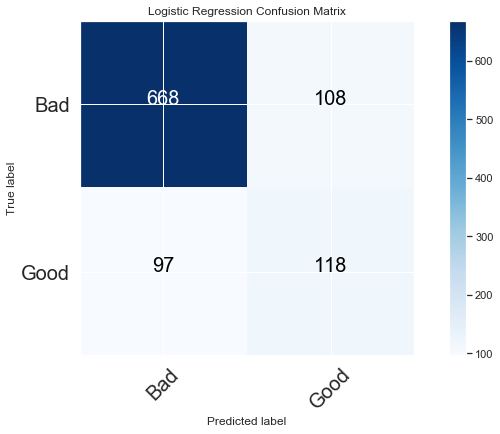

Precision: 0.5221238938053098
Accuracy: 0.79313824419778
F1: 0.5351473922902494
Recall: 0.5488372093023256


In [54]:
#Run the Logistic Regression model & print confusion matrix, precision and accuracy score

lr = grid_lr.best_estimator_
lr.fit(X_train, y_train)
lr_predict = lr.predict(X_test)
lr_confusion_matrix = confusion_matrix(y_test, lr_predict)

print(lr_confusion_matrix)
plot_confusion_matrix(lr_confusion_matrix, title='Logistic Regression Confusion Matrix')
plt.show()

print("Precision:", precision_score(y_test, lr_predict))
print("Accuracy:", accuracy_score(y_test, lr_predict))
print("F1:",metrics.f1_score(y_test, lr_predict))
print("Recall:",metrics.recall_score(y_test, lr_predict))

### Model: Decision Tree

#### Tune Hyperparameters

In [55]:
# Create estimator
dt = DecisionTreeClassifier()
# Create parameters to test
parameters={'criterion': ['gini','entropy'], 
            'min_samples_leaf' : range(5,100,15),
            'max_depth': range(2,20,1)}
# Create the instance of GridSearchCV
grid_dt=GridSearchCV(dt, parameters, cv=5, scoring='precision', verbose=2)
# Fit the Gridsearch to our data
grid_dt.fit(X_train,y_train)

Fitting 5 folds for each of 252 candidates, totalling 1260 fits
[CV] criterion=gini, max_depth=2, min_samples_leaf=5 .................
[CV] .. criterion=gini, max_depth=2, min_samples_leaf=5, total=   0.0s
[CV] criterion=gini, max_depth=2, min_samples_leaf=5 .................
[CV] .. criterion=gini, max_depth=2, min_samples_leaf=5, total=   0.0s
[CV] criterion=gini, max_depth=2, min_samples_leaf=5 .................
[CV] .. criterion=gini, max_depth=2, min_samples_leaf=5, total=   0.0s
[CV] criterion=gini, max_depth=2, min_samples_leaf=5 .................
[CV] .. criterion=gini, max_depth=2, min_samples_leaf=5, total=   0.0s
[CV] criterion=gini, max_depth=2, min_samples_leaf=5 .................
[CV] .. criterion=gini, max_depth=2, min_samples_leaf=5, total=   0.0s
[CV] criterion=gini, max_depth=2, min_samples_leaf=20 ................
[CV] . criterion=gini, max_depth=2, min_samples_leaf=20, total=   0.0s
[CV] criterion=gini, max_depth=2, min_samples_leaf=20 ................
[CV] . criter

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] . criterion=gini, max_depth=2, min_samples_leaf=50, total=   0.0s
[CV] criterion=gini, max_depth=2, min_samples_leaf=50 ................
[CV] . criterion=gini, max_depth=2, min_samples_leaf=50, total=   0.0s
[CV] criterion=gini, max_depth=2, min_samples_leaf=50 ................
[CV] . criterion=gini, max_depth=2, min_samples_leaf=50, total=   0.0s
[CV] criterion=gini, max_depth=2, min_samples_leaf=65 ................
[CV] . criterion=gini, max_depth=2, min_samples_leaf=65, total=   0.0s
[CV] criterion=gini, max_depth=2, min_samples_leaf=65 ................
[CV] . criterion=gini, max_depth=2, min_samples_leaf=65, total=   0.0s
[CV] criterion=gini, max_depth=2, min_samples_leaf=65 ................
[CV] . criterion=gini, max_depth=2, min_samples_leaf=65, total=   0.0s
[CV] criterion=gini, max_depth=2, min_samples_leaf=65 ................
[CV] . criterion=gini, max_depth=2, min_samples_leaf=65, total=   0.0s
[CV] criterion=gini, max_depth=2, min_samples_leaf=65 ................
[CV] .

[CV] criterion=gini, max_depth=4, min_samples_leaf=20 ................
[CV] . criterion=gini, max_depth=4, min_samples_leaf=20, total=   0.0s
[CV] criterion=gini, max_depth=4, min_samples_leaf=35 ................
[CV] . criterion=gini, max_depth=4, min_samples_leaf=35, total=   0.0s
[CV] criterion=gini, max_depth=4, min_samples_leaf=35 ................
[CV] . criterion=gini, max_depth=4, min_samples_leaf=35, total=   0.0s
[CV] criterion=gini, max_depth=4, min_samples_leaf=35 ................
[CV] . criterion=gini, max_depth=4, min_samples_leaf=35, total=   0.0s
[CV] criterion=gini, max_depth=4, min_samples_leaf=35 ................
[CV] . criterion=gini, max_depth=4, min_samples_leaf=35, total=   0.0s
[CV] criterion=gini, max_depth=4, min_samples_leaf=35 ................
[CV] . criterion=gini, max_depth=4, min_samples_leaf=35, total=   0.0s
[CV] criterion=gini, max_depth=4, min_samples_leaf=50 ................
[CV] . criterion=gini, max_depth=4, min_samples_leaf=50, total=   0.0s
[CV] c

[CV] . criterion=gini, max_depth=6, min_samples_leaf=20, total=   0.0s
[CV] criterion=gini, max_depth=6, min_samples_leaf=20 ................
[CV] . criterion=gini, max_depth=6, min_samples_leaf=20, total=   0.0s
[CV] criterion=gini, max_depth=6, min_samples_leaf=20 ................
[CV] . criterion=gini, max_depth=6, min_samples_leaf=20, total=   0.0s
[CV] criterion=gini, max_depth=6, min_samples_leaf=35 ................
[CV] . criterion=gini, max_depth=6, min_samples_leaf=35, total=   0.0s
[CV] criterion=gini, max_depth=6, min_samples_leaf=35 ................
[CV] . criterion=gini, max_depth=6, min_samples_leaf=35, total=   0.0s
[CV] criterion=gini, max_depth=6, min_samples_leaf=35 ................
[CV] . criterion=gini, max_depth=6, min_samples_leaf=35, total=   0.0s
[CV] criterion=gini, max_depth=6, min_samples_leaf=35 ................
[CV] . criterion=gini, max_depth=6, min_samples_leaf=35, total=   0.0s
[CV] criterion=gini, max_depth=6, min_samples_leaf=35 ................
[CV] .

[CV] .. criterion=gini, max_depth=8, min_samples_leaf=5, total=   0.0s
[CV] criterion=gini, max_depth=8, min_samples_leaf=20 ................
[CV] . criterion=gini, max_depth=8, min_samples_leaf=20, total=   0.0s
[CV] criterion=gini, max_depth=8, min_samples_leaf=20 ................
[CV] . criterion=gini, max_depth=8, min_samples_leaf=20, total=   0.0s
[CV] criterion=gini, max_depth=8, min_samples_leaf=20 ................
[CV] . criterion=gini, max_depth=8, min_samples_leaf=20, total=   0.0s
[CV] criterion=gini, max_depth=8, min_samples_leaf=20 ................
[CV] . criterion=gini, max_depth=8, min_samples_leaf=20, total=   0.0s
[CV] criterion=gini, max_depth=8, min_samples_leaf=20 ................
[CV] . criterion=gini, max_depth=8, min_samples_leaf=20, total=   0.0s
[CV] criterion=gini, max_depth=8, min_samples_leaf=35 ................
[CV] . criterion=gini, max_depth=8, min_samples_leaf=35, total=   0.0s
[CV] criterion=gini, max_depth=8, min_samples_leaf=35 ................
[CV] .

[CV] . criterion=gini, max_depth=10, min_samples_leaf=5, total=   0.0s
[CV] criterion=gini, max_depth=10, min_samples_leaf=5 ................
[CV] . criterion=gini, max_depth=10, min_samples_leaf=5, total=   0.0s
[CV] criterion=gini, max_depth=10, min_samples_leaf=5 ................
[CV] . criterion=gini, max_depth=10, min_samples_leaf=5, total=   0.0s
[CV] criterion=gini, max_depth=10, min_samples_leaf=5 ................
[CV] . criterion=gini, max_depth=10, min_samples_leaf=5, total=   0.0s
[CV] criterion=gini, max_depth=10, min_samples_leaf=5 ................
[CV] . criterion=gini, max_depth=10, min_samples_leaf=5, total=   0.0s
[CV] criterion=gini, max_depth=10, min_samples_leaf=20 ...............
[CV]  criterion=gini, max_depth=10, min_samples_leaf=20, total=   0.0s
[CV] criterion=gini, max_depth=10, min_samples_leaf=20 ...............
[CV]  criterion=gini, max_depth=10, min_samples_leaf=20, total=   0.0s
[CV] criterion=gini, max_depth=10, min_samples_leaf=20 ...............
[CV]  

[CV]  criterion=gini, max_depth=11, min_samples_leaf=80, total=   0.0s
[CV] criterion=gini, max_depth=11, min_samples_leaf=80 ...............
[CV]  criterion=gini, max_depth=11, min_samples_leaf=80, total=   0.0s
[CV] criterion=gini, max_depth=11, min_samples_leaf=80 ...............
[CV]  criterion=gini, max_depth=11, min_samples_leaf=80, total=   0.0s
[CV] criterion=gini, max_depth=11, min_samples_leaf=80 ...............
[CV]  criterion=gini, max_depth=11, min_samples_leaf=80, total=   0.0s
[CV] criterion=gini, max_depth=11, min_samples_leaf=95 ...............
[CV]  criterion=gini, max_depth=11, min_samples_leaf=95, total=   0.0s
[CV] criterion=gini, max_depth=11, min_samples_leaf=95 ...............
[CV]  criterion=gini, max_depth=11, min_samples_leaf=95, total=   0.0s
[CV] criterion=gini, max_depth=11, min_samples_leaf=95 ...............
[CV]  criterion=gini, max_depth=11, min_samples_leaf=95, total=   0.0s
[CV] criterion=gini, max_depth=11, min_samples_leaf=95 ...............
[CV]  

[CV]  criterion=gini, max_depth=13, min_samples_leaf=50, total=   0.0s
[CV] criterion=gini, max_depth=13, min_samples_leaf=50 ...............
[CV]  criterion=gini, max_depth=13, min_samples_leaf=50, total=   0.0s
[CV] criterion=gini, max_depth=13, min_samples_leaf=50 ...............
[CV]  criterion=gini, max_depth=13, min_samples_leaf=50, total=   0.0s
[CV] criterion=gini, max_depth=13, min_samples_leaf=50 ...............
[CV]  criterion=gini, max_depth=13, min_samples_leaf=50, total=   0.0s
[CV] criterion=gini, max_depth=13, min_samples_leaf=65 ...............
[CV]  criterion=gini, max_depth=13, min_samples_leaf=65, total=   0.0s
[CV] criterion=gini, max_depth=13, min_samples_leaf=65 ...............
[CV]  criterion=gini, max_depth=13, min_samples_leaf=65, total=   0.0s
[CV] criterion=gini, max_depth=13, min_samples_leaf=65 ...............
[CV]  criterion=gini, max_depth=13, min_samples_leaf=65, total=   0.0s
[CV] criterion=gini, max_depth=13, min_samples_leaf=65 ...............
[CV]  

[CV]  criterion=gini, max_depth=15, min_samples_leaf=20, total=   0.0s
[CV] criterion=gini, max_depth=15, min_samples_leaf=20 ...............
[CV]  criterion=gini, max_depth=15, min_samples_leaf=20, total=   0.0s
[CV] criterion=gini, max_depth=15, min_samples_leaf=20 ...............
[CV]  criterion=gini, max_depth=15, min_samples_leaf=20, total=   0.0s
[CV] criterion=gini, max_depth=15, min_samples_leaf=35 ...............
[CV]  criterion=gini, max_depth=15, min_samples_leaf=35, total=   0.0s
[CV] criterion=gini, max_depth=15, min_samples_leaf=35 ...............
[CV]  criterion=gini, max_depth=15, min_samples_leaf=35, total=   0.0s
[CV] criterion=gini, max_depth=15, min_samples_leaf=35 ...............
[CV]  criterion=gini, max_depth=15, min_samples_leaf=35, total=   0.0s
[CV] criterion=gini, max_depth=15, min_samples_leaf=35 ...............
[CV]  criterion=gini, max_depth=15, min_samples_leaf=35, total=   0.0s
[CV] criterion=gini, max_depth=15, min_samples_leaf=35 ...............
[CV]  

[CV] . criterion=gini, max_depth=17, min_samples_leaf=5, total=   0.0s
[CV] criterion=gini, max_depth=17, min_samples_leaf=5 ................
[CV] . criterion=gini, max_depth=17, min_samples_leaf=5, total=   0.0s
[CV] criterion=gini, max_depth=17, min_samples_leaf=5 ................
[CV] . criterion=gini, max_depth=17, min_samples_leaf=5, total=   0.0s
[CV] criterion=gini, max_depth=17, min_samples_leaf=20 ...............
[CV]  criterion=gini, max_depth=17, min_samples_leaf=20, total=   0.0s
[CV] criterion=gini, max_depth=17, min_samples_leaf=20 ...............
[CV]  criterion=gini, max_depth=17, min_samples_leaf=20, total=   0.0s
[CV] criterion=gini, max_depth=17, min_samples_leaf=20 ...............
[CV]  criterion=gini, max_depth=17, min_samples_leaf=20, total=   0.0s
[CV] criterion=gini, max_depth=17, min_samples_leaf=20 ...............
[CV]  criterion=gini, max_depth=17, min_samples_leaf=20, total=   0.0s
[CV] criterion=gini, max_depth=17, min_samples_leaf=20 ...............
[CV]  

[CV]  criterion=gini, max_depth=18, min_samples_leaf=95, total=   0.0s
[CV] criterion=gini, max_depth=18, min_samples_leaf=95 ...............
[CV]  criterion=gini, max_depth=18, min_samples_leaf=95, total=   0.0s
[CV] criterion=gini, max_depth=18, min_samples_leaf=95 ...............
[CV]  criterion=gini, max_depth=18, min_samples_leaf=95, total=   0.0s
[CV] criterion=gini, max_depth=19, min_samples_leaf=5 ................
[CV] . criterion=gini, max_depth=19, min_samples_leaf=5, total=   0.0s
[CV] criterion=gini, max_depth=19, min_samples_leaf=5 ................
[CV] . criterion=gini, max_depth=19, min_samples_leaf=5, total=   0.0s
[CV] criterion=gini, max_depth=19, min_samples_leaf=5 ................
[CV] . criterion=gini, max_depth=19, min_samples_leaf=5, total=   0.0s
[CV] criterion=gini, max_depth=19, min_samples_leaf=5 ................
[CV] . criterion=gini, max_depth=19, min_samples_leaf=5, total=   0.0s
[CV] criterion=gini, max_depth=19, min_samples_leaf=5 ................
[CV] .

[CV]  criterion=entropy, max_depth=2, min_samples_leaf=65, total=   0.0s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=65 .............
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=65, total=   0.0s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=65 .............
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=65, total=   0.0s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=80 .............
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=80, total=   0.0s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=80 .............
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=80, total=   0.0s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=80 .............
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=80, total=   0.0s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=80 .............
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=80, total=   0.0s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=80 ......

[CV]  criterion=entropy, max_depth=4, min_samples_leaf=65, total=   0.0s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=65 .............
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=65, total=   0.0s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=65 .............
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=65, total=   0.0s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=80 .............
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=80, total=   0.0s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=80 .............
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=80, total=   0.0s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=80 .............
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=80, total=   0.0s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=80 .............
[CV]  criterion=entropy, max_depth=4, min_samples_leaf=80, total=   0.0s
[CV] criterion=entropy, max_depth=4, min_samples_leaf=80 ......

[CV]  criterion=entropy, max_depth=6, min_samples_leaf=35, total=   0.0s
[CV] criterion=entropy, max_depth=6, min_samples_leaf=35 .............
[CV]  criterion=entropy, max_depth=6, min_samples_leaf=35, total=   0.0s
[CV] criterion=entropy, max_depth=6, min_samples_leaf=35 .............
[CV]  criterion=entropy, max_depth=6, min_samples_leaf=35, total=   0.0s
[CV] criterion=entropy, max_depth=6, min_samples_leaf=35 .............
[CV]  criterion=entropy, max_depth=6, min_samples_leaf=35, total=   0.0s
[CV] criterion=entropy, max_depth=6, min_samples_leaf=35 .............
[CV]  criterion=entropy, max_depth=6, min_samples_leaf=35, total=   0.0s
[CV] criterion=entropy, max_depth=6, min_samples_leaf=50 .............
[CV]  criterion=entropy, max_depth=6, min_samples_leaf=50, total=   0.0s
[CV] criterion=entropy, max_depth=6, min_samples_leaf=50 .............
[CV]  criterion=entropy, max_depth=6, min_samples_leaf=50, total=   0.0s
[CV] criterion=entropy, max_depth=6, min_samples_leaf=50 ......

[CV]  criterion=entropy, max_depth=8, min_samples_leaf=20, total=   0.0s
[CV] criterion=entropy, max_depth=8, min_samples_leaf=20 .............
[CV]  criterion=entropy, max_depth=8, min_samples_leaf=20, total=   0.0s
[CV] criterion=entropy, max_depth=8, min_samples_leaf=20 .............
[CV]  criterion=entropy, max_depth=8, min_samples_leaf=20, total=   0.0s
[CV] criterion=entropy, max_depth=8, min_samples_leaf=20 .............
[CV]  criterion=entropy, max_depth=8, min_samples_leaf=20, total=   0.0s
[CV] criterion=entropy, max_depth=8, min_samples_leaf=35 .............
[CV]  criterion=entropy, max_depth=8, min_samples_leaf=35, total=   0.0s
[CV] criterion=entropy, max_depth=8, min_samples_leaf=35 .............
[CV]  criterion=entropy, max_depth=8, min_samples_leaf=35, total=   0.0s
[CV] criterion=entropy, max_depth=8, min_samples_leaf=35 .............
[CV]  criterion=entropy, max_depth=8, min_samples_leaf=35, total=   0.0s
[CV] criterion=entropy, max_depth=8, min_samples_leaf=35 ......

[CV]  criterion=entropy, max_depth=10, min_samples_leaf=5, total=   0.0s
[CV] criterion=entropy, max_depth=10, min_samples_leaf=5 .............
[CV]  criterion=entropy, max_depth=10, min_samples_leaf=5, total=   0.0s
[CV] criterion=entropy, max_depth=10, min_samples_leaf=5 .............
[CV]  criterion=entropy, max_depth=10, min_samples_leaf=5, total=   0.0s
[CV] criterion=entropy, max_depth=10, min_samples_leaf=5 .............
[CV]  criterion=entropy, max_depth=10, min_samples_leaf=5, total=   0.0s
[CV] criterion=entropy, max_depth=10, min_samples_leaf=5 .............
[CV]  criterion=entropy, max_depth=10, min_samples_leaf=5, total=   0.0s
[CV] criterion=entropy, max_depth=10, min_samples_leaf=20 ............
[CV]  criterion=entropy, max_depth=10, min_samples_leaf=20, total=   0.0s
[CV] criterion=entropy, max_depth=10, min_samples_leaf=20 ............
[CV]  criterion=entropy, max_depth=10, min_samples_leaf=20, total=   0.0s
[CV] criterion=entropy, max_depth=10, min_samples_leaf=20 ...

[CV]  criterion=entropy, max_depth=11, min_samples_leaf=80, total=   0.0s
[CV] criterion=entropy, max_depth=11, min_samples_leaf=80 ............
[CV]  criterion=entropy, max_depth=11, min_samples_leaf=80, total=   0.0s
[CV] criterion=entropy, max_depth=11, min_samples_leaf=80 ............
[CV]  criterion=entropy, max_depth=11, min_samples_leaf=80, total=   0.0s
[CV] criterion=entropy, max_depth=11, min_samples_leaf=80 ............
[CV]  criterion=entropy, max_depth=11, min_samples_leaf=80, total=   0.0s
[CV] criterion=entropy, max_depth=11, min_samples_leaf=95 ............
[CV]  criterion=entropy, max_depth=11, min_samples_leaf=95, total=   0.0s
[CV] criterion=entropy, max_depth=11, min_samples_leaf=95 ............
[CV]  criterion=entropy, max_depth=11, min_samples_leaf=95, total=   0.0s
[CV] criterion=entropy, max_depth=11, min_samples_leaf=95 ............
[CV]  criterion=entropy, max_depth=11, min_samples_leaf=95, total=   0.0s
[CV] criterion=entropy, max_depth=11, min_samples_leaf=9

[CV]  criterion=entropy, max_depth=13, min_samples_leaf=50, total=   0.0s
[CV] criterion=entropy, max_depth=13, min_samples_leaf=50 ............
[CV]  criterion=entropy, max_depth=13, min_samples_leaf=50, total=   0.0s
[CV] criterion=entropy, max_depth=13, min_samples_leaf=50 ............
[CV]  criterion=entropy, max_depth=13, min_samples_leaf=50, total=   0.0s
[CV] criterion=entropy, max_depth=13, min_samples_leaf=50 ............
[CV]  criterion=entropy, max_depth=13, min_samples_leaf=50, total=   0.0s
[CV] criterion=entropy, max_depth=13, min_samples_leaf=65 ............
[CV]  criterion=entropy, max_depth=13, min_samples_leaf=65, total=   0.0s
[CV] criterion=entropy, max_depth=13, min_samples_leaf=65 ............
[CV]  criterion=entropy, max_depth=13, min_samples_leaf=65, total=   0.0s
[CV] criterion=entropy, max_depth=13, min_samples_leaf=65 ............
[CV]  criterion=entropy, max_depth=13, min_samples_leaf=65, total=   0.0s
[CV] criterion=entropy, max_depth=13, min_samples_leaf=6

[CV]  criterion=entropy, max_depth=15, min_samples_leaf=20, total=   0.0s
[CV] criterion=entropy, max_depth=15, min_samples_leaf=20 ............
[CV]  criterion=entropy, max_depth=15, min_samples_leaf=20, total=   0.0s
[CV] criterion=entropy, max_depth=15, min_samples_leaf=20 ............
[CV]  criterion=entropy, max_depth=15, min_samples_leaf=20, total=   0.0s
[CV] criterion=entropy, max_depth=15, min_samples_leaf=20 ............
[CV]  criterion=entropy, max_depth=15, min_samples_leaf=20, total=   0.0s
[CV] criterion=entropy, max_depth=15, min_samples_leaf=35 ............
[CV]  criterion=entropy, max_depth=15, min_samples_leaf=35, total=   0.0s
[CV] criterion=entropy, max_depth=15, min_samples_leaf=35 ............
[CV]  criterion=entropy, max_depth=15, min_samples_leaf=35, total=   0.0s
[CV] criterion=entropy, max_depth=15, min_samples_leaf=35 ............
[CV]  criterion=entropy, max_depth=15, min_samples_leaf=35, total=   0.0s
[CV] criterion=entropy, max_depth=15, min_samples_leaf=3

[CV]  criterion=entropy, max_depth=16, min_samples_leaf=95, total=   0.0s
[CV] criterion=entropy, max_depth=16, min_samples_leaf=95 ............
[CV]  criterion=entropy, max_depth=16, min_samples_leaf=95, total=   0.0s
[CV] criterion=entropy, max_depth=17, min_samples_leaf=5 .............
[CV]  criterion=entropy, max_depth=17, min_samples_leaf=5, total=   0.0s
[CV] criterion=entropy, max_depth=17, min_samples_leaf=5 .............
[CV]  criterion=entropy, max_depth=17, min_samples_leaf=5, total=   0.0s
[CV] criterion=entropy, max_depth=17, min_samples_leaf=5 .............
[CV]  criterion=entropy, max_depth=17, min_samples_leaf=5, total=   0.0s
[CV] criterion=entropy, max_depth=17, min_samples_leaf=5 .............
[CV]  criterion=entropy, max_depth=17, min_samples_leaf=5, total=   0.0s
[CV] criterion=entropy, max_depth=17, min_samples_leaf=5 .............
[CV]  criterion=entropy, max_depth=17, min_samples_leaf=5, total=   0.0s
[CV] criterion=entropy, max_depth=17, min_samples_leaf=20 ...

[CV]  criterion=entropy, max_depth=18, min_samples_leaf=65, total=   0.0s
[CV] criterion=entropy, max_depth=18, min_samples_leaf=65 ............
[CV]  criterion=entropy, max_depth=18, min_samples_leaf=65, total=   0.0s
[CV] criterion=entropy, max_depth=18, min_samples_leaf=65 ............
[CV]  criterion=entropy, max_depth=18, min_samples_leaf=65, total=   0.0s
[CV] criterion=entropy, max_depth=18, min_samples_leaf=65 ............
[CV]  criterion=entropy, max_depth=18, min_samples_leaf=65, total=   0.0s
[CV] criterion=entropy, max_depth=18, min_samples_leaf=65 ............
[CV]  criterion=entropy, max_depth=18, min_samples_leaf=65, total=   0.0s
[CV] criterion=entropy, max_depth=18, min_samples_leaf=80 ............
[CV]  criterion=entropy, max_depth=18, min_samples_leaf=80, total=   0.0s
[CV] criterion=entropy, max_depth=18, min_samples_leaf=80 ............
[CV]  criterion=entropy, max_depth=18, min_samples_leaf=80, total=   0.0s
[CV] criterion=entropy, max_depth=18, min_samples_leaf=8

[Parallel(n_jobs=1)]: Done 1260 out of 1260 | elapsed:   20.6s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'criterion': ['gini', 'entropy'], 'min_samples_leaf': range(5, 100, 15), 'max_depth': range(2, 20)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='precision', verbose=2)

#### Run Decision Tree Model

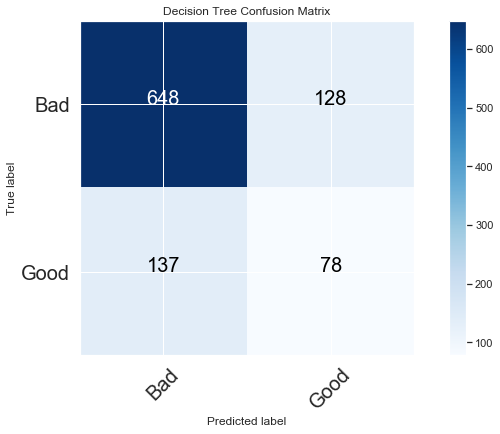

[[648 128]
 [137  78]]
Precision: 0.3786407766990291
Accuracy: 0.7325933400605449
F1: 0.3705463182897862
Recall: 0.3627906976744186


In [56]:
#Run the Decision Tree model & print confusion matrix, precision and accuracy score

dt = grid_dt.best_estimator_
dt.fit(X_train,y_train)
dt_predict = dt.predict(X_test)
dt_conf_matrix = confusion_matrix(y_test, dt_predict)

plot_confusion_matrix(dt_conf_matrix, title='Decision Tree Confusion Matrix')
plt.show()

print(dt_conf_matrix)
print("Precision:", precision_score(y_test, dt_predict))
print("Accuracy:", accuracy_score(y_test, dt_predict))
print("F1:",metrics.f1_score(y_test, dt_predict))
print("Recall:",metrics.recall_score(y_test, dt_predict))

### Random Forest

#### Hypertune Parameters

In [57]:
# Create our estimator
rf = RandomForestClassifier()
# Create our parameters to test
parameters = {
    'n_estimators': [10, 30, 100],
    'criterion': ['gini', 'entropy'],    
    'max_depth': [None, 2, 6, 10],
    'min_samples_split': [10, 20],
    'min_samples_leaf': [1,2,5]
}
# Create the instance of GridSearchCV
grid_rf=GridSearchCV(rf, parameters, cv=5, scoring='precision', verbose=2)
# Fit the Gridsearch to our data
grid_rf.fit(X_train,y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits
[CV] criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=10 
[CV]  criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=10, total=   0.1s
[CV] criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=10 
[CV]  criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=10, total=   0.1s
[CV] criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV]  criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=10, total=   0.0s
[CV] criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=10 
[CV]  criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=10, total=   0.1s
[CV] criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=10 
[CV]  criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=10, total=   0.1s
[CV] criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=30 
[CV]  criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=30, total=   0.2s
[CV] criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=30 
[CV]  criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=30, total=   0.1s
[CV] criterion=gini, max_depth=None, min_samples_leaf=1, min_

[CV]  criterion=gini, max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=100, total=   0.5s
[CV] criterion=gini, max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=100 
[CV]  criterion=gini, max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=100, total=   0.5s
[CV] criterion=gini, max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=100 
[CV]  criterion=gini, max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=100, total=   0.4s
[CV] criterion=gini, max_depth=None, min_samples_leaf=2, min_samples_split=20, n_estimators=10 
[CV]  criterion=gini, max_depth=None, min_samples_leaf=2, min_samples_split=20, n_estimators=10, total=   0.0s
[CV] criterion=gini, max_depth=None, min_samples_leaf=2, min_samples_split=20, n_estimators=10 
[CV]  criterion=gini, max_depth=None, min_samples_leaf=2, min_samples_split=20, n_estimators=10, total=   0.0s
[CV] criterion=gini, max_depth=None, min_samples_leaf=2,

[CV]  criterion=gini, max_depth=None, min_samples_leaf=5, min_samples_split=20, n_estimators=30, total=   0.1s
[CV] criterion=gini, max_depth=None, min_samples_leaf=5, min_samples_split=20, n_estimators=30 
[CV]  criterion=gini, max_depth=None, min_samples_leaf=5, min_samples_split=20, n_estimators=30, total=   0.1s
[CV] criterion=gini, max_depth=None, min_samples_leaf=5, min_samples_split=20, n_estimators=100 
[CV]  criterion=gini, max_depth=None, min_samples_leaf=5, min_samples_split=20, n_estimators=100, total=   0.4s
[CV] criterion=gini, max_depth=None, min_samples_leaf=5, min_samples_split=20, n_estimators=100 
[CV]  criterion=gini, max_depth=None, min_samples_leaf=5, min_samples_split=20, n_estimators=100, total=   0.4s
[CV] criterion=gini, max_depth=None, min_samples_leaf=5, min_samples_split=20, n_estimators=100 
[CV]  criterion=gini, max_depth=None, min_samples_leaf=5, min_samples_split=20, n_estimators=100, total=   0.4s
[CV] criterion=gini, max_depth=None, min_samples_leaf=5

[CV]  criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=10, n_estimators=30, total=   0.1s
[CV] criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=10, n_estimators=30 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=10, n_estimators=30, total=   0.1s
[CV] criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=10, n_estimators=30 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=10, n_estimators=30, total=   0.1s
[CV] criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=10, n_estimators=30 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=10, n_estimators=30, total=   0.1s
[CV] criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=10, n_estimators=100 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=10, n_estimators=100, total=   0.4s
[CV] criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=10, n_estimato

[CV]  criterion=gini, max_depth=2, min_samples_leaf=5, min_samples_split=20, n_estimators=30, total=   0.1s
[CV] criterion=gini, max_depth=2, min_samples_leaf=5, min_samples_split=20, n_estimators=30 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=5, min_samples_split=20, n_estimators=30, total=   0.1s
[CV] criterion=gini, max_depth=2, min_samples_leaf=5, min_samples_split=20, n_estimators=30 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=5, min_samples_split=20, n_estimators=30, total=   0.1s
[CV] criterion=gini, max_depth=2, min_samples_leaf=5, min_samples_split=20, n_estimators=30 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=5, min_samples_split=20, n_estimators=30, total=   0.1s
[CV] criterion=gini, max_depth=2, min_samples_leaf=5, min_samples_split=20, n_estimators=30 
[CV]  criterion=gini, max_depth=2, min_samples_leaf=5, min_samples_split=20, n_estimators=30, total=   0.1s
[CV] criterion=gini, max_depth=2, min_samples_leaf=5, min_samples_split=20, n_estimators

[CV]  criterion=gini, max_depth=6, min_samples_leaf=2, min_samples_split=10, n_estimators=30, total=   0.1s
[CV] criterion=gini, max_depth=6, min_samples_leaf=2, min_samples_split=10, n_estimators=30 
[CV]  criterion=gini, max_depth=6, min_samples_leaf=2, min_samples_split=10, n_estimators=30, total=   0.1s
[CV] criterion=gini, max_depth=6, min_samples_leaf=2, min_samples_split=10, n_estimators=30 
[CV]  criterion=gini, max_depth=6, min_samples_leaf=2, min_samples_split=10, n_estimators=30, total=   0.1s
[CV] criterion=gini, max_depth=6, min_samples_leaf=2, min_samples_split=10, n_estimators=30 
[CV]  criterion=gini, max_depth=6, min_samples_leaf=2, min_samples_split=10, n_estimators=30, total=   0.1s
[CV] criterion=gini, max_depth=6, min_samples_leaf=2, min_samples_split=10, n_estimators=30 
[CV]  criterion=gini, max_depth=6, min_samples_leaf=2, min_samples_split=10, n_estimators=30, total=   0.1s
[CV] criterion=gini, max_depth=6, min_samples_leaf=2, min_samples_split=10, n_estimators

[CV]  criterion=gini, max_depth=6, min_samples_leaf=5, min_samples_split=20, n_estimators=30, total=   0.1s
[CV] criterion=gini, max_depth=6, min_samples_leaf=5, min_samples_split=20, n_estimators=30 
[CV]  criterion=gini, max_depth=6, min_samples_leaf=5, min_samples_split=20, n_estimators=30, total=   0.1s
[CV] criterion=gini, max_depth=6, min_samples_leaf=5, min_samples_split=20, n_estimators=30 
[CV]  criterion=gini, max_depth=6, min_samples_leaf=5, min_samples_split=20, n_estimators=30, total=   0.1s
[CV] criterion=gini, max_depth=6, min_samples_leaf=5, min_samples_split=20, n_estimators=30 
[CV]  criterion=gini, max_depth=6, min_samples_leaf=5, min_samples_split=20, n_estimators=30, total=   0.1s
[CV] criterion=gini, max_depth=6, min_samples_leaf=5, min_samples_split=20, n_estimators=30 
[CV]  criterion=gini, max_depth=6, min_samples_leaf=5, min_samples_split=20, n_estimators=30, total=   0.1s
[CV] criterion=gini, max_depth=6, min_samples_leaf=5, min_samples_split=20, n_estimators

[CV]  criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=10, total=   0.0s
[CV] criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=30 
[CV]  criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=30, total=   0.1s
[CV] criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=30 
[CV]  criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=30, total=   0.1s
[CV] criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=30 
[CV]  criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=30, total=   0.1s
[CV] criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=30 
[CV]  criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=30, total=   0.1s
[CV] criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=10, n_

[CV]  criterion=gini, max_depth=10, min_samples_leaf=5, min_samples_split=20, n_estimators=10, total=   0.0s
[CV] criterion=gini, max_depth=10, min_samples_leaf=5, min_samples_split=20, n_estimators=30 
[CV]  criterion=gini, max_depth=10, min_samples_leaf=5, min_samples_split=20, n_estimators=30, total=   0.1s
[CV] criterion=gini, max_depth=10, min_samples_leaf=5, min_samples_split=20, n_estimators=30 
[CV]  criterion=gini, max_depth=10, min_samples_leaf=5, min_samples_split=20, n_estimators=30, total=   0.1s
[CV] criterion=gini, max_depth=10, min_samples_leaf=5, min_samples_split=20, n_estimators=30 
[CV]  criterion=gini, max_depth=10, min_samples_leaf=5, min_samples_split=20, n_estimators=30, total=   0.1s
[CV] criterion=gini, max_depth=10, min_samples_leaf=5, min_samples_split=20, n_estimators=30 
[CV]  criterion=gini, max_depth=10, min_samples_leaf=5, min_samples_split=20, n_estimators=30, total=   0.1s
[CV] criterion=gini, max_depth=10, min_samples_leaf=5, min_samples_split=20, n_

[CV]  criterion=entropy, max_depth=None, min_samples_leaf=1, min_samples_split=20, n_estimators=100, total=   0.6s
[CV] criterion=entropy, max_depth=None, min_samples_leaf=1, min_samples_split=20, n_estimators=100 
[CV]  criterion=entropy, max_depth=None, min_samples_leaf=1, min_samples_split=20, n_estimators=100, total=   0.5s
[CV] criterion=entropy, max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=10 
[CV]  criterion=entropy, max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=10, total=   0.1s
[CV] criterion=entropy, max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=10 
[CV]  criterion=entropy, max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=10, total=   0.1s
[CV] criterion=entropy, max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=10 
[CV]  criterion=entropy, max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=10, total=   0.1s
[CV] criterion=entropy, max_dep

[CV]  criterion=entropy, max_depth=None, min_samples_leaf=5, min_samples_split=10, n_estimators=30, total=   0.2s
[CV] criterion=entropy, max_depth=None, min_samples_leaf=5, min_samples_split=10, n_estimators=30 
[CV]  criterion=entropy, max_depth=None, min_samples_leaf=5, min_samples_split=10, n_estimators=30, total=   0.1s
[CV] criterion=entropy, max_depth=None, min_samples_leaf=5, min_samples_split=10, n_estimators=30 
[CV]  criterion=entropy, max_depth=None, min_samples_leaf=5, min_samples_split=10, n_estimators=30, total=   0.3s
[CV] criterion=entropy, max_depth=None, min_samples_leaf=5, min_samples_split=10, n_estimators=100 
[CV]  criterion=entropy, max_depth=None, min_samples_leaf=5, min_samples_split=10, n_estimators=100, total=   0.7s
[CV] criterion=entropy, max_depth=None, min_samples_leaf=5, min_samples_split=10, n_estimators=100 
[CV]  criterion=entropy, max_depth=None, min_samples_leaf=5, min_samples_split=10, n_estimators=100, total=   0.6s
[CV] criterion=entropy, max_de

[CV]  criterion=entropy, max_depth=2, min_samples_leaf=1, min_samples_split=20, n_estimators=30, total=   0.1s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=1, min_samples_split=20, n_estimators=30 
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=1, min_samples_split=20, n_estimators=30, total=   0.1s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=1, min_samples_split=20, n_estimators=30 
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=1, min_samples_split=20, n_estimators=30, total=   0.1s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=1, min_samples_split=20, n_estimators=30 
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=1, min_samples_split=20, n_estimators=30, total=   0.1s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=1, min_samples_split=20, n_estimators=30 
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=1, min_samples_split=20, n_estimators=30, total=   0.1s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=1, min_

[CV]  criterion=entropy, max_depth=2, min_samples_leaf=5, min_samples_split=10, n_estimators=30, total=   0.1s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=5, min_samples_split=10, n_estimators=30 
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=5, min_samples_split=10, n_estimators=30, total=   0.1s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=5, min_samples_split=10, n_estimators=30 
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=5, min_samples_split=10, n_estimators=30, total=   0.1s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=5, min_samples_split=10, n_estimators=30 
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=5, min_samples_split=10, n_estimators=30, total=   0.1s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=5, min_samples_split=10, n_estimators=100 
[CV]  criterion=entropy, max_depth=2, min_samples_leaf=5, min_samples_split=10, n_estimators=100, total=   0.2s
[CV] criterion=entropy, max_depth=2, min_samples_leaf=5, mi

[CV]  criterion=entropy, max_depth=6, min_samples_leaf=1, min_samples_split=20, n_estimators=10, total=   0.0s
[CV] criterion=entropy, max_depth=6, min_samples_leaf=1, min_samples_split=20, n_estimators=30 
[CV]  criterion=entropy, max_depth=6, min_samples_leaf=1, min_samples_split=20, n_estimators=30, total=   0.1s
[CV] criterion=entropy, max_depth=6, min_samples_leaf=1, min_samples_split=20, n_estimators=30 
[CV]  criterion=entropy, max_depth=6, min_samples_leaf=1, min_samples_split=20, n_estimators=30, total=   0.1s
[CV] criterion=entropy, max_depth=6, min_samples_leaf=1, min_samples_split=20, n_estimators=30 
[CV]  criterion=entropy, max_depth=6, min_samples_leaf=1, min_samples_split=20, n_estimators=30, total=   0.1s
[CV] criterion=entropy, max_depth=6, min_samples_leaf=1, min_samples_split=20, n_estimators=30 
[CV]  criterion=entropy, max_depth=6, min_samples_leaf=1, min_samples_split=20, n_estimators=30, total=   0.1s
[CV] criterion=entropy, max_depth=6, min_samples_leaf=1, min_

[CV]  criterion=entropy, max_depth=6, min_samples_leaf=2, min_samples_split=20, n_estimators=100, total=   0.3s
[CV] criterion=entropy, max_depth=6, min_samples_leaf=5, min_samples_split=10, n_estimators=10 
[CV]  criterion=entropy, max_depth=6, min_samples_leaf=5, min_samples_split=10, n_estimators=10, total=   0.0s
[CV] criterion=entropy, max_depth=6, min_samples_leaf=5, min_samples_split=10, n_estimators=10 
[CV]  criterion=entropy, max_depth=6, min_samples_leaf=5, min_samples_split=10, n_estimators=10, total=   0.0s
[CV] criterion=entropy, max_depth=6, min_samples_leaf=5, min_samples_split=10, n_estimators=10 
[CV]  criterion=entropy, max_depth=6, min_samples_leaf=5, min_samples_split=10, n_estimators=10, total=   0.0s
[CV] criterion=entropy, max_depth=6, min_samples_leaf=5, min_samples_split=10, n_estimators=10 
[CV]  criterion=entropy, max_depth=6, min_samples_leaf=5, min_samples_split=10, n_estimators=10, total=   0.0s
[CV] criterion=entropy, max_depth=6, min_samples_leaf=5, min

[CV]  criterion=entropy, max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=30, total=   0.2s
[CV] criterion=entropy, max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=100 
[CV]  criterion=entropy, max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=100, total=   0.6s
[CV] criterion=entropy, max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=100 
[CV]  criterion=entropy, max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=100, total=   0.6s
[CV] criterion=entropy, max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=100 
[CV]  criterion=entropy, max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=100, total=   0.6s
[CV] criterion=entropy, max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=100 
[CV]  criterion=entropy, max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=100, total=   0.5s
[CV] criterion=entropy, max_depth=10, min_sa

[CV]  criterion=entropy, max_depth=10, min_samples_leaf=2, min_samples_split=20, n_estimators=30, total=   0.1s
[CV] criterion=entropy, max_depth=10, min_samples_leaf=2, min_samples_split=20, n_estimators=30 
[CV]  criterion=entropy, max_depth=10, min_samples_leaf=2, min_samples_split=20, n_estimators=30, total=   0.1s
[CV] criterion=entropy, max_depth=10, min_samples_leaf=2, min_samples_split=20, n_estimators=30 
[CV]  criterion=entropy, max_depth=10, min_samples_leaf=2, min_samples_split=20, n_estimators=30, total=   0.1s
[CV] criterion=entropy, max_depth=10, min_samples_leaf=2, min_samples_split=20, n_estimators=30 
[CV]  criterion=entropy, max_depth=10, min_samples_leaf=2, min_samples_split=20, n_estimators=30, total=   0.1s
[CV] criterion=entropy, max_depth=10, min_samples_leaf=2, min_samples_split=20, n_estimators=30 
[CV]  criterion=entropy, max_depth=10, min_samples_leaf=2, min_samples_split=20, n_estimators=30, total=   0.1s
[CV] criterion=entropy, max_depth=10, min_samples_le

[Parallel(n_jobs=1)]: Done 720 out of 720 | elapsed:  2.5min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [10, 30, 100], 'criterion': ['gini', 'entropy'], 'max_depth': [None, 2, 6, 10], 'min_samples_split': [10, 20], 'min_samples_leaf': [1, 2, 5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='precision', verbose=2)

#### Model Random Forest

[[288   3]
 [ 43   6]]


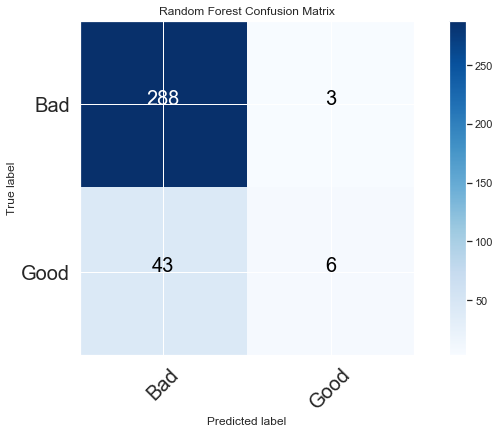

Precision: 0.6666666666666666
Accuracy: 0.8647058823529412
F1: 0.20689655172413793
Recall: 0.12244897959183673


In [45]:
# Random Forest model & print confusion matrix, precision and accuracy score

rf = grid_rf.best_estimator_
rf.fit(X_train, y_train)
rf_predict = rf.predict(X_test)
rf_confusion_matrix = confusion_matrix(y_test, rf_predict)
print(rf_confusion_matrix)
plot_confusion_matrix(rf_confusion_matrix, title='Random Forest Confusion Matrix')
plt.show()
print("Precision:", precision_score(y_test, rf_predict))
print("Accuracy:", accuracy_score(y_test, rf_predict))
print("F1:",metrics.f1_score(y_test, rf_predict))
print("Recall:",metrics.recall_score(y_test, rf_predict))

### Model: XG Boost

#### Hypertune Parameters

In [58]:
# Create our estimator
xg_b = xgb.XGBClassifier()
# Create our parameters to test
parameters = {
    "learning_rate": [0.1, 0.2, 0.3],
    'max_depth': [3,6, 9],
    'subsample': [ 0.5,0.7,1],
}
# Create the instance of GridSearchCV
grid_xgb=GridSearchCV(xg_b, parameters, cv=5, scoring='precision', verbose=2)
# Fit the Gridsearch to our data
grid_xgb.fit(X_train,y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] learning_rate=0.1, max_depth=3, subsample=0.5 ...................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .... learning_rate=0.1, max_depth=3, subsample=0.5, total=   0.3s
[CV] learning_rate=0.1, max_depth=3, subsample=0.5 ...................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV] .... learning_rate=0.1, max_depth=3, subsample=0.5, total=   0.3s
[CV] learning_rate=0.1, max_depth=3, subsample=0.5 ...................
[CV] .... learning_rate=0.1, max_depth=3, subsample=0.5, total=   0.3s
[CV] learning_rate=0.1, max_depth=3, subsample=0.5 ...................
[CV] .... learning_rate=0.1, max_depth=3, subsample=0.5, total=   0.4s
[CV] learning_rate=0.1, max_depth=3, subsample=0.5 ...................
[CV] .... learning_rate=0.1, max_depth=3, subsample=0.5, total=   0.3s
[CV] learning_rate=0.1, max_depth=3, subsample=0.7 ...................
[CV] .... learning_rate=0.1, max_depth=3, subsample=0.7, total=   0.3s
[CV] learning_rate=0.1, max_depth=3, subsample=0.7 ...................
[CV] .... learning_rate=0.1, max_depth=3, subsample=0.7, total=   0.4s
[CV] learning_rate=0.1, max_depth=3, subsample=0.7 ...................
[CV] .... learning_rate=0.1, max_depth=3, subsample=0.7, total=   0.3s
[CV] learning_rate=0.1, max_depth=3, subsample=0.7 ...................
[CV] .

[CV] ...... learning_rate=0.2, max_depth=3, subsample=1, total=   0.2s
[CV] learning_rate=0.2, max_depth=6, subsample=0.5 ...................
[CV] .... learning_rate=0.2, max_depth=6, subsample=0.5, total=   0.5s
[CV] learning_rate=0.2, max_depth=6, subsample=0.5 ...................
[CV] .... learning_rate=0.2, max_depth=6, subsample=0.5, total=   0.4s
[CV] learning_rate=0.2, max_depth=6, subsample=0.5 ...................
[CV] .... learning_rate=0.2, max_depth=6, subsample=0.5, total=   0.4s
[CV] learning_rate=0.2, max_depth=6, subsample=0.5 ...................
[CV] .... learning_rate=0.2, max_depth=6, subsample=0.5, total=   0.4s
[CV] learning_rate=0.2, max_depth=6, subsample=0.5 ...................
[CV] .... learning_rate=0.2, max_depth=6, subsample=0.5, total=   0.4s
[CV] learning_rate=0.2, max_depth=6, subsample=0.7 ...................
[CV] .... learning_rate=0.2, max_depth=6, subsample=0.7, total=   0.4s
[CV] learning_rate=0.2, max_depth=6, subsample=0.7 ...................
[CV] .

[CV] ...... learning_rate=0.3, max_depth=6, subsample=1, total=   0.5s
[CV] learning_rate=0.3, max_depth=6, subsample=1 .....................
[CV] ...... learning_rate=0.3, max_depth=6, subsample=1, total=   0.6s
[CV] learning_rate=0.3, max_depth=6, subsample=1 .....................
[CV] ...... learning_rate=0.3, max_depth=6, subsample=1, total=   0.5s
[CV] learning_rate=0.3, max_depth=9, subsample=0.5 ...................
[CV] .... learning_rate=0.3, max_depth=9, subsample=0.5, total=   0.6s
[CV] learning_rate=0.3, max_depth=9, subsample=0.5 ...................
[CV] .... learning_rate=0.3, max_depth=9, subsample=0.5, total=   0.5s
[CV] learning_rate=0.3, max_depth=9, subsample=0.5 ...................
[CV] .... learning_rate=0.3, max_depth=9, subsample=0.5, total=   0.6s
[CV] learning_rate=0.3, max_depth=9, subsample=0.5 ...................
[CV] .... learning_rate=0.3, max_depth=9, subsample=0.5, total=   0.6s
[CV] learning_rate=0.3, max_depth=9, subsample=0.5 ...................
[CV] .

[Parallel(n_jobs=1)]: Done 135 out of 135 | elapsed:  1.0min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'learning_rate': [0.1, 0.2, 0.3], 'max_depth': [3, 6, 9], 'subsample': [0.5, 0.7, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='precision', verbose=2)

#### Run XG Boost Model

[[713  63]
 [114 101]]


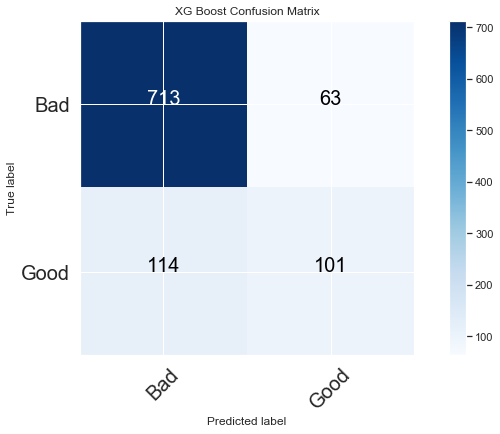

Precision: 0.6158536585365854
Accuracy: 0.8213925327951564
F1: 0.5329815303430079
Recall: 0.4697674418604651


In [59]:
# XG Boost model & print confusion matrix, precision and accuracy score

xgb = grid_xgb.best_estimator_
xgb.fit(X_train, y_train)
xgb_predict = xgb.predict(X_test)
xgb_confusion_matrix = confusion_matrix(y_test, xgb_predict)
print(xgb_confusion_matrix)
plot_confusion_matrix(xgb_confusion_matrix, title='XG Boost Confusion Matrix')
plt.show()
print("Precision:", precision_score(y_test, xgb_predict))
print("Accuracy:", accuracy_score(y_test, xgb_predict))
print("F1:",metrics.f1_score(y_test, xgb_predict))
print("Recall:",metrics.recall_score(y_test, xgb_predict))

### Cross Validation